In [38]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [39]:
df = pd.read_csv('../project_data/PAS+crime+extra_final.csv')

In [40]:
df.shape[0]

75912

In [41]:
df.dropna(subset=['NQ135BD'], inplace=True)
df = df[df['NQ135BD'] < 95]
print(df.shape[0])

75664


In [42]:
columns_to_drop = df.filter(regex='^WT_').columns
df = df.drop(columns=columns_to_drop)
print(df.shape[0])
print(df.shape[1])

75664
599


In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame
# df = pd.DataFrame({
#     'Month_Number': [...],
#     'NQ135BD': [...],
#     'selfemployed_number': [...]
# })

# Read the month-year dictionary
df_monthdict = pd.read_csv('month_year_dict.csv')

# Create a dictionary to map Month_Number to Month_Year
month_dict = dict(zip(df_monthdict['Month_Number'], df_monthdict['Month_Year']))

# Map the Month_Number to Month_Year in the original DataFrame
df['Month_Number'] = df['Month_Number'].map(month_dict)

# Convert Month_Year to datetime
df['Month_Number'] = pd.to_datetime(df['Month_Number'], format='%b %Y')

# Calculate mean values
mean_values = df.groupby('Month_Number').mean().reset_index()


In [44]:
answer_map5 = {
'Barking and Dagenham': 1,
'Barnet': 2,
'Bexley': 3,
'Brent': 4,
'Bromley': 5,
'Camden': 6,
'Croydon': 7,
'Ealing': 8,
'Enfield': 9,
'Greenwich': 10,
'Hackney': 11,
'Hammersmith and Fulham': 12,
'Haringey': 13,
'Harrow': 14,
'Havering': 15,
'Hillingdon': 16,
'Hounslow': 17,
'Islington': 18,
'Kensington and Chelsea': 19,
'Kingston upon Thames': 20,
'Lambeth': 21,
'Lewisham': 22,
'Merton': 23,
'Newham': 24,
'Redbridge': 25,
'Richmond upon Thames': 26,
'Southwark': 27,
'Sutton': 28,
'Tower Hamlets': 29,
'Waltham Forest': 30,
'Wandsworth': 31,
'Westminster': 32,
'No tab': 100
}
reverse_answer_map5 = {v: k for k, v in answer_map5.items()}
df['Borough'] = df['Borough'].map(reverse_answer_map5)


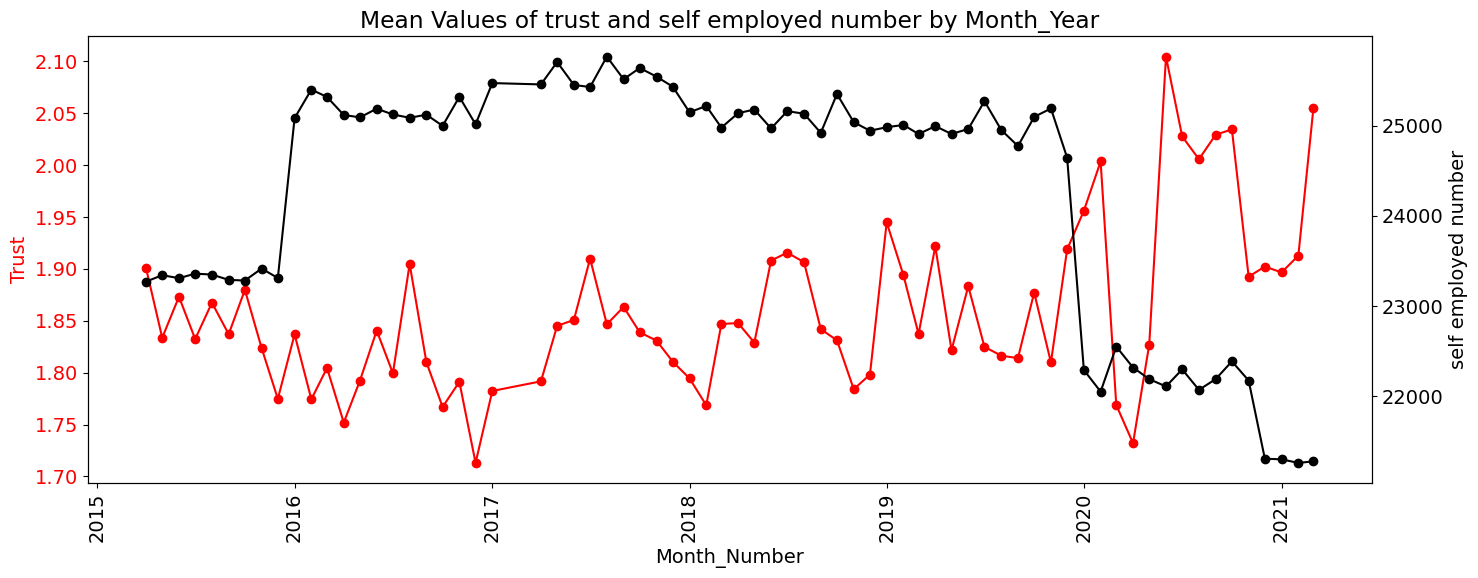

In [57]:
# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot mean NQ135BD on primary y-axis
ax1.plot(mean_values['Month_Number'], mean_values['NQ135BD'], color='red', marker='o', label='Trust')
ax1.set_xlabel('Month_Number')
ax1.set_ylabel('Trust', color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability


# Create secondary y-axis
ax2 = ax1.twinx()
ax2.plot(mean_values['Month_Number'], mean_values['selfemployed_number'], color='Black', marker='o', label='self employed number')
ax2.set_ylabel('self employed number', color='Black')
ax2.tick_params(axis='y', labelcolor='Black')

# Title and show plot
plt.title('Mean Values of trust and self employed number by Month_Year')
fig.tight_layout()
plt.savefig('self_employed_number.png')
plt.show()

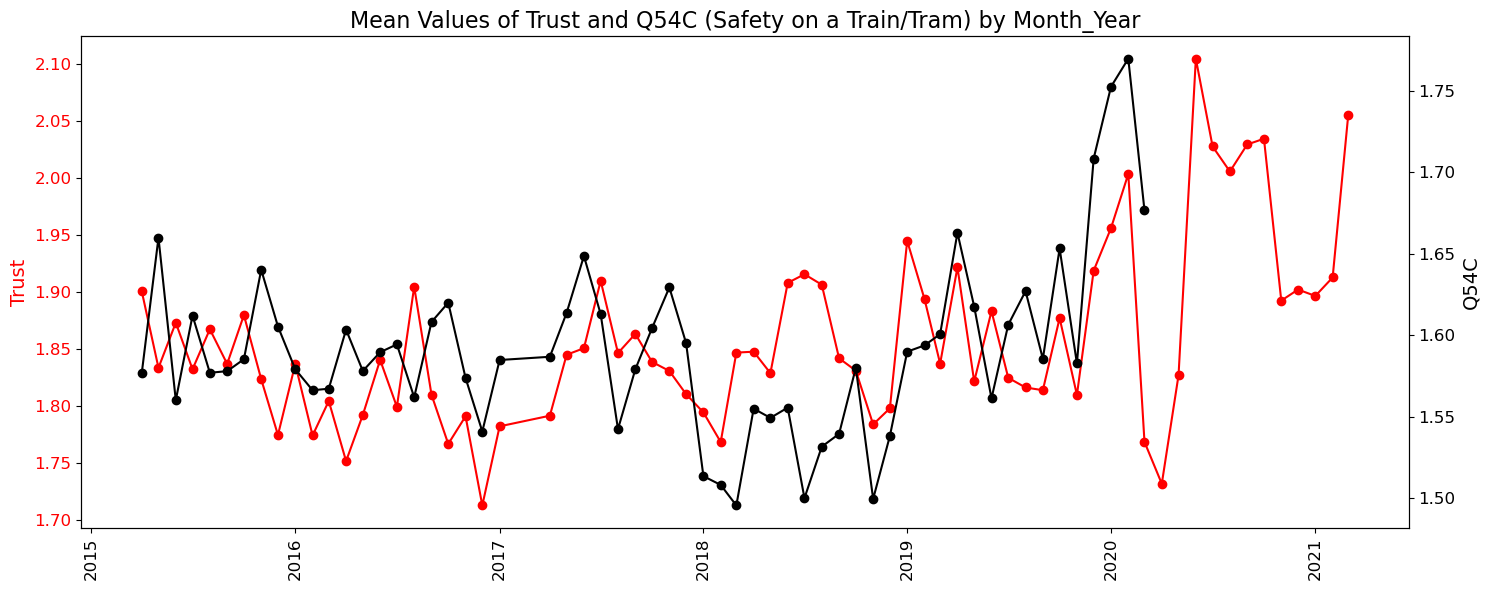

In [54]:
# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot mean NQ135BD on primary y-axis
ax1.plot(mean_values['Month_Number'], mean_values['NQ135BD'], color='red', marker='o', label='Trust')
#ax1.set_xlabel('Month_Number', fontsize=14)
ax1.set_ylabel('Trust', color='red', fontsize=14)
ax1.tick_params(axis='y', labelcolor='red', labelsize=12)
ax1.tick_params(axis='x', rotation=90, labelsize=12)  # Rotate x-axis labels for better readability

# Create secondary y-axis
ax2 = ax1.twinx()
ax2.plot(mean_values['Month_Number'], mean_values['Q54C'], color='black', marker='o', label='Q54C')
ax2.set_ylabel('Q54C', color='black', fontsize=14)
ax2.tick_params(axis='y', labelcolor='black', labelsize=12)

# Title and show plot
plt.title('Mean Values of Trust and Q54C (Safety on a Train/Tram) by Month_Year', fontsize=16)
fig.tight_layout()
plt.savefig('Q54C.png')
plt.show()

In [45]:
df['Borough'].head(5)

0    Islington
1       Sutton
2       Sutton
3       Sutton
4       Sutton
Name: Borough, dtype: object

Q54C: On the LAST OCCASION, how safe did you feel on a train/tram? Value = 1 Very safe Value = 2 Value = 3 Value = 4 Not at all safe

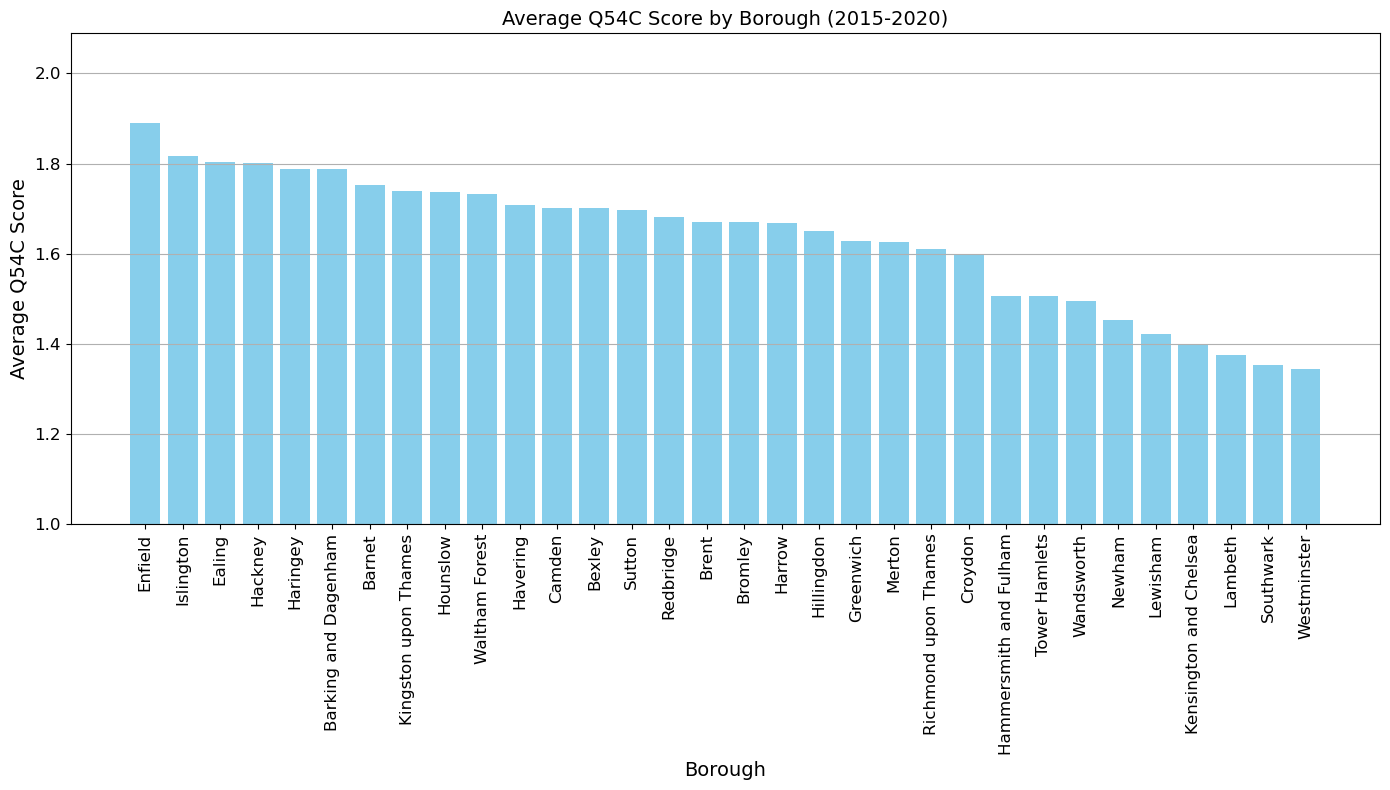

In [52]:
# Filter data for the period from 2020 to 2021
start_date = '2019-01-01'
end_date = '2020-12-31'
mask = (df['Month_Number'] >= start_date) & (df['Month_Number'] <= end_date)
df_filtered = df[mask]

# Group by Borough and calculate the average Q54C score
df_avg = df_filtered.groupby('Borough')['Q54C'].mean().reset_index()

# Sort the boroughs by average Q54C score for better visualization
df_avg = df_avg.sort_values(by='Q54C', ascending=False)

# Plotting
plt.figure(figsize=(14, 8))
plt.bar(df_avg['Borough'], df_avg['Q54C'], color='skyblue')

plt.xlabel('Borough', fontsize=14)
plt.ylabel('Average Q54C Score', fontsize=14)
plt.title('Average Q54C Score by Borough (2015-2020)', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(1, df_avg['Q54C'].max() + 0.2)  # Start y-axis from 1
plt.grid(axis='y')
plt.savefig('average Q54C score by borough.png')
plt.tight_layout()
plt.show()

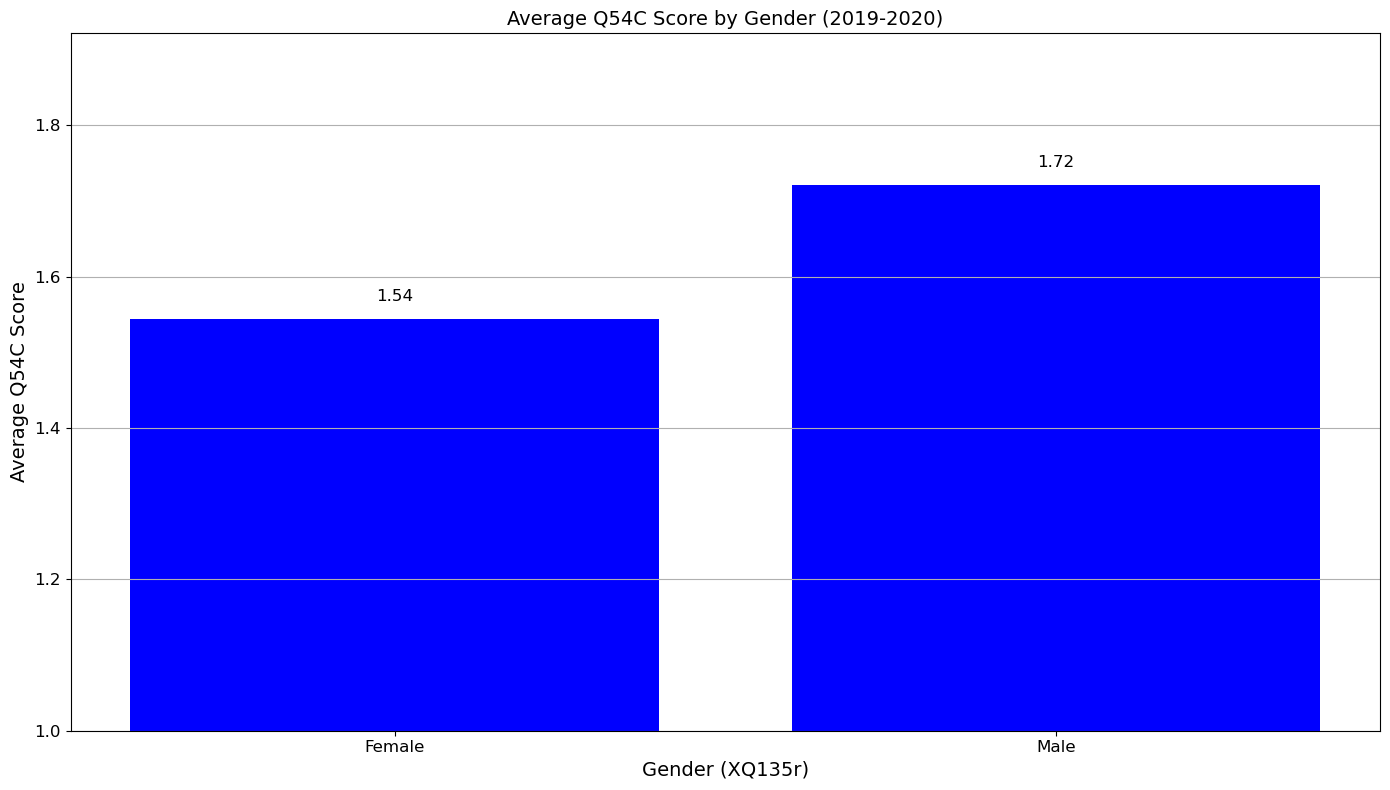

In [66]:
# Filter data for the period from 2019 to 2020
start_date = '2019-01-01'
end_date = '2020-12-31'
mask = (df['Month_Number'] >= start_date) & (df['Month_Number'] <= end_date)
df_filtered = df[mask]

# Filter rows where 'XQ135r' is 1 (male) or 2 (female)
df_filtered = df_filtered[df_filtered['XQ135r'].isin([1, 2])]

# Group by Borough and calculate the average Q54C score
df_avg = df_filtered.groupby('XQ135r')['Q54C'].mean().reset_index()

# Sort the boroughs by average Q54C score for better visualization
df_avg = df_avg.sort_values(by='Q54C', ascending=False)

# Plotting
plt.figure(figsize=(14, 8))
bars = plt.bar(df_avg['XQ135r'], df_avg['Q54C'], color='blue')

# Adding the specific values on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 2), ha='center', va='bottom', fontsize=12)

plt.xlabel('Gender (XQ135r)', fontsize=14)
plt.ylabel('Average Q54C Score', fontsize=14)
plt.title('Average Q54C Score by Gender (2019-2020)', fontsize=14)
plt.xticks(ticks=df_avg['XQ135r'], labels=['Male', 'Female'], rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(1, df_avg['Q54C'].max() + 0.2)  # Start y-axis from 1 and add more space on top
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('average_Q54C_score_by_gender.png')
plt.show()

In [69]:
# Calculate the Pearson correlation coefficient between Q60 and Q3I
correlation = df['NQ135BD'].corr(df['Q54C'])

print(f'The Pearson correlation coefficient between trust score and Q54C is {correlation}')

The Pearson correlation coefficient between trust score and Q54C is 0.1742741077078652
